#📌 Extracão

In [411]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Configurações iniciais para visualizações
%matplotlib inline
sns.set_palette('viridis')

# Função para exibir texto em Markdown
def print_md(text):
    display(Markdown(text))

# Carregar o JSON
with open('/content/TelecomX_Data.json', 'r') as file:
    data = json.load(file)





#🔧 Transformação

In [412]:
# Converter JSON para DataFrame
df = pd.json_normalize(data)

# Mostrar as primeiras linhas
print("🔹 Amostra dos dados:")
print(df.head())

# Verificar formato
print("\n🔹 Formato do DataFrame (linhas, colunas):", df.shape)

# Verificar valores ausentes
print("\n🔹 Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificar linhas duplicadas
print("\n🔹 Linhas duplicadas:", df.duplicated().sum())

# Remover duplicatas, se houver
df.drop_duplicates(inplace=True)

# Verificar tipos de dados
print("\n🔹 Tipos de dados:")
print(df.dtypes)

# Corrigir coluna de charges (converter texto para float)
if 'account.Charges.Total' in df.columns:
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Rechecar valores ausentes após conversão
print("\n🔹 Valores ausentes (após conversão):")
print(df.isnull().sum())

# Verificar valores únicos nas colunas categóricas
print("\n🔹 Valores únicos por coluna categórica (com possíveis inconsistências):")
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColuna '{col}':")
    print(df[col].value_counts(dropna=False))

# Padronizar strings (minúsculas e sem espaços)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Exportar dataset limpo (opcional)
df.to_csv("TelecomX_Data_Limpo.csv", index=False)

# Verificar e tratar valores ausentes em Churn (substituir vazio por 'Unknown')
df['Churn'] = df['Churn'].replace('', 'Desconhecido')

# Verificar valores ausentes em account.Charges.Monthly
if df['account.Charges.Monthly'].isnull().sum() > 0:
    print("Valores ausentes encontrados em account.Charges.Monthly. Substituindo por 0.")
    df['account.Charges.Monthly'] = df['account.Charges.Monthly'].fillna(0)

print("\n✅ Limpeza concluída. Dataset pronto para análise exploratória.")



🔹 Amostra dos dados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.

In [413]:
dados_limpos = pd.read_csv('/content/TelecomX_Data_Limpo.csv')
df = dados_limpos
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [414]:

# Criar a coluna Contas_Diarias
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Exibir as primeiras 5 linhas com a nova coluna
print("Primeiras 5 linhas com a coluna Contas_Diarias:")
print(df[['customerID', 'account.Charges.Monthly', 'Contas_Diarias', 'Churn']].head())

# Exibir estatísticas descritivas da nova coluna
print("\nEstatísticas Descritivas da Coluna Contas_Diarias:")
print(df['Contas_Diarias'].describe())

# Salvar o DataFrame atualizado como CSV
df.to_csv('TelecomX_Data_Conta_diarias.csv', index=False)
print("\nDataFrame atualizado salvo como 'TelecomX_Data_Contas_diarias.csv'")

Primeiras 5 linhas com a coluna Contas_Diarias:
   customerID  account.Charges.Monthly  Contas_Diarias Churn
0  0002-orfbo                     65.6        2.186667    no
1  0003-mknfe                     59.9        1.996667    no
2  0004-tlhlj                     73.9        2.463333   yes
3  0011-igkff                     98.0        3.266667   yes
4  0013-exchz                     83.9        2.796667   yes

Estatísticas Descritivas da Coluna Contas_Diarias:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Contas_Diarias, dtype: float64

DataFrame atualizado salvo como 'TelecomX_Data_Contas_diarias.csv'


In [415]:
contas_diarias = pd.read_csv('/content/TelecomX_Data_Conta_diarias.csv')
df = contas_diarias
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


Padronização e Transformação de Dados (Opcional)

In [416]:


# 1. Converter valores textuais para binários
binary_columns = {
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.PaperlessBilling': 'Fatura_Sem_Papel'
}

for col, new_name in binary_columns.items():
    # Mapear Yes/No e No [serviço] para 1/0
    df[new_name] = df[col].map({
        'Yes': 1,
        'No': 0,
        'No phone service': 0,
        'No internet service': 0
    })
    df.drop(col, axis=1, inplace=True)

# Codificar Churn (Yes=1, No=0, Unknown=NaN)
df['Churn_Binario'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('Churn', axis=1, inplace=True)

# 2. Renomear colunas para português
rename_columns = {
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.tenure': 'Tempo_Contrato',
    'internet.InternetService': 'Servico_Internet',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Contas_Mensais',
    'account.Charges.Total': 'Contas_Total',
    'Contas_Diarias': 'Contas_Diarias',
    'Churn_Binario': 'Churn'
}

df.rename(columns=rename_columns, inplace=True)

# 3. Traduzir valores categóricos
# Gênero
df['Genero'] = df['Genero'].map({
    'Male': 'Masculino',
    'Female': 'Feminino'
})

# Serviço de Internet
df['Servico_Internet'] = df['Servico_Internet'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra_Óptica',
    'No': 'Nenhum'
})

# Tipo de Contrato
df['Tipo_Contrato'] = df['Tipo_Contrato'].map({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

# Método de Pagamento
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].map({
    'Electronic check': 'Cheque_Eletrônico',
    'Mailed check': 'Cheque_Enviado',
    'Bank transfer (automatic)': 'Transferência_Bancária',
    'Credit card (automatic)': 'Cartão_Crédito'
})

# 4. Exibir amostra e salvar
print("Amostra do DataFrame Padronizado (primeiras 5 linhas):")
print(df.head())

# Exibir colunas e tipos de dados
print("\nColunas e Tipos de Dados Após Padronização:")
print(df.dtypes)

# Salvar o DataFrame transformado
df.to_csv('TelecomX_Data_Padronizado.csv', index=False)
df = pd.read_csv('/content/TelecomX_Data_Padronizado.csv')
df.head()
#print("\nDataFrame padronizado salvo como 'TelecomX_Data_Padronizado.csv'")

Amostra do DataFrame Padronizado (primeiras 5 linhas):
   ID_Cliente Genero  Idoso  Tempo_Contrato Servico_Internet Tipo_Contrato  \
0  0002-orfbo    NaN      0               9              NaN           NaN   
1  0003-mknfe    NaN      0               9              NaN           NaN   
2  0004-tlhlj    NaN      0               4              NaN           NaN   
3  0011-igkff    NaN      1              13              NaN           NaN   
4  0013-exchz    NaN      1               3              NaN           NaN   

  Metodo_Pagamento  Contas_Mensais  Contas_Total  Contas_Diarias  ...  \
0              NaN            65.6        593.30        2.186667  ...   
1              NaN            59.9        542.40        1.996667  ...   
2              NaN            73.9        280.85        2.463333  ...   
3              NaN            98.0       1237.85        3.266667  ...   
4              NaN            83.9        267.40        2.796667  ...   

   Servico_Telefone  Multiplas_Linhas

,ID_Cliente,Genero,Idoso,Tempo_Contrato,Servico_Internet,Tipo_Contrato,Metodo_Pagamento,Contas_Mensais,Contas_Total,Contas_Diarias,...,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Sem_Papel,Churn
0,0002-orfbo,NaN,0,9,NaN,NaN,NaN,65.6,593.30,2.186667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0003-mknfe,NaN,0,9,NaN,NaN,NaN,59.9,542.40,1.996667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0004-tlhlj,NaN,0,4,NaN,NaN,NaN,73.9,280.85,2.463333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-igkff,NaN,1,13,NaN,NaN,NaN,98.0,1237.85,3.266667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-exchz,NaN,1,3,NaN,NaN,NaN,83.9,267.40,2.796667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#📊 Carga e análise

In [417]:

# Carregar o dataset com a nova coluna 'contas_diarias'
df = pd.read_csv('TelecomX_Data_Conta_diarias.csv')

# Mostrar as primeiras linhas
print("🔹 Amostra dos dados:")
print(df.head())

# Verificar formato do DataFrame
print("\n🔹 Formato do DataFrame (linhas, colunas):", df.shape)

# Estatísticas descritivas para variáveis numéricas
print("\n🔹 Estatísticas descritivas (numéricas):")
print(df.describe())

# Estatísticas descritivas por variável categórica (exemplo: churn)
print("\n🔹 Estatísticas por churn (média e mediana):")
print("Média:")
print(df.groupby("Churn")[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Contas_Diarias"]].mean())

print("\nMediana:")
print(df.groupby("Churn")[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Contas_Diarias"]].median())

# Desvio padrão
print("\n🔹 Desvio padrão:")
print(df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Contas_Diarias"]].std())

# Verificar correlações entre as variáveis numéricas
print("\n🔹 Correlação entre variáveis numéricas:")
print(df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Contas_Diarias"]].corr())

# Ver distribuição de churn
print("\n🔹 Distribuição da variável target (churn):")
print(df["Churn"].value_counts())

# Porcentagem de churn
print("\n🔹 Porcentagem de churn:")
print(df["Churn"].value_counts(normalize=True) * 100)


🔹 Amostra dos dados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-orfbo    no          female                       0              yes   
1  0003-mknfe    no            male                       0               no   
2  0004-tlhlj   yes            male                       0               no   
3  0011-igkff   yes            male                       1              yes   
4  0013-exchz   yes          female                       1              yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 yes                9                yes                  no   
1                  no                9                yes                 yes   
2                  no                4                yes                  no   
3                  no               13                yes                  no   
4                  no                3                yes                  no   

  internet.

Tradução

In [418]:
# Traduzir os nomes das colunas para Português (BR)
colunas_traduzidas = {
    'customerID': 'ID do Cliente',
    'Churn': 'Cancelamento',
    'customer.gender': 'Gênero do Cliente',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Tempo de Assinatura',
    'phone.PhoneService': 'Serviço de Telefone',
    'phone.MultipleLines': 'Múltiplas Linhas',
    'internet.InternetService': 'Serviço de Internet',
    'internet.OnlineSecurity': 'Segurança Online',
    'internet.OnlineBackup': 'Backup Online',
    'internet.DeviceProtection': 'Proteção de Dispositivo',
    'internet.TechSupport': 'Suporte Técnico',
    'internet.StreamingTV': 'Streaming de TV',
    'internet.StreamingMovies': 'Streaming de Filmes',
    'account.Contract': 'Tipo de Contrato',
    'account.PaperlessBilling': 'Faturamento Sem Papel',
    'account.PaymentMethod': 'Método de Pagamento',
    'account.Charges.Monthly': 'Cobranças Mensais',
    'account.Charges.Total': 'Cobranças Totais',
    'Contas_Diarias': 'Contas Diárias'
}

df.rename(columns=colunas_traduzidas, inplace=True)

Graficos

### Distribuição de Cancelamento

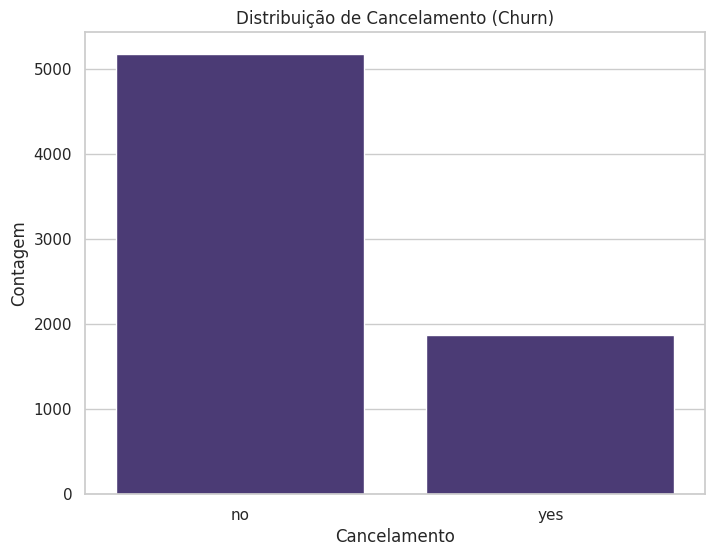

In [419]:
print_md("### Distribuição de Cancelamento")
plt.figure(figsize=(8, 6))
sns.countplot(x='Cancelamento', data=df)
plt.title('Distribuição de Cancelamento (Churn)')
plt.xlabel('Cancelamento')
plt.ylabel('Contagem')
plt.show()

### Tempo de Assinatura vs. Cancelamento

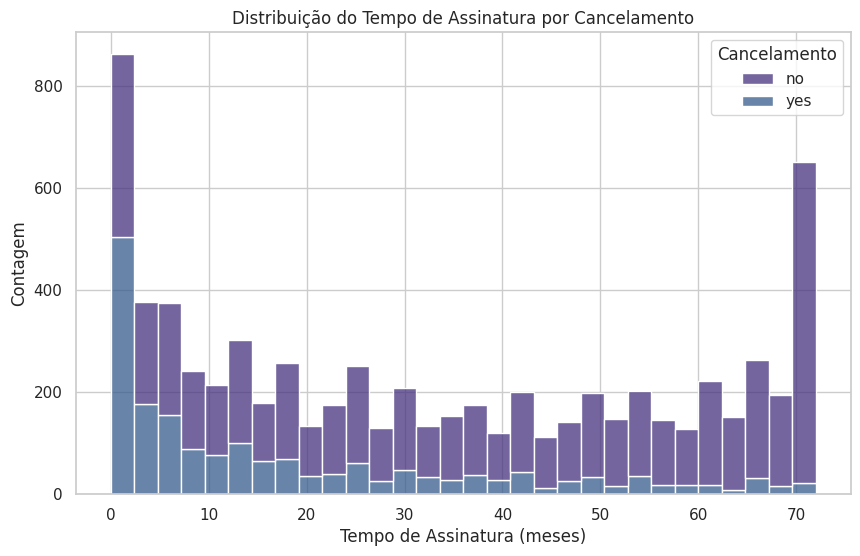

In [420]:
# Relação entre Tempo de Assinatura e Cancelamento
print_md("### Tempo de Assinatura vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo de Assinatura', hue='Cancelamento', multiple='stack', bins=30)
plt.title('Distribuição do Tempo de Assinatura por Cancelamento')
plt.xlabel('Tempo de Assinatura (meses)')
plt.ylabel('Contagem')
plt.show()

### Cobranças Mensais vs. Cancelamento

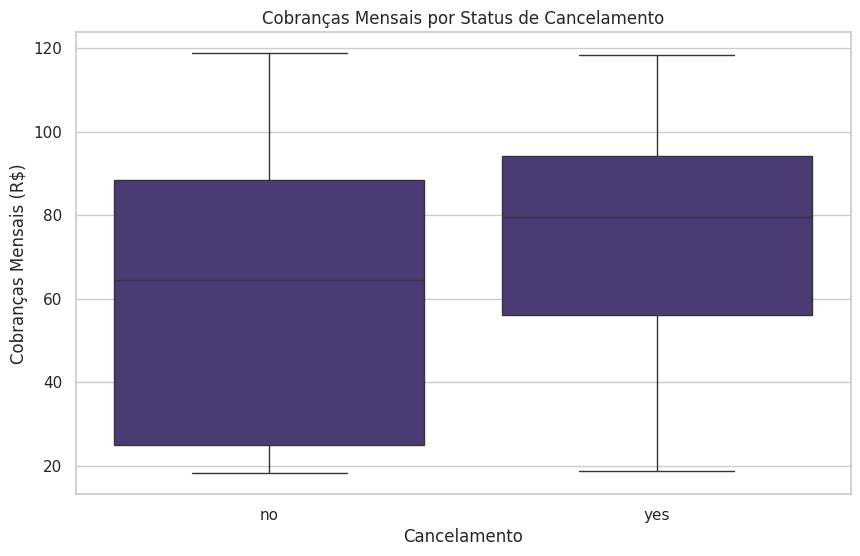

In [421]:
# Cobranças Mensais vs. Cancelamento
print_md("### Cobranças Mensais vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancelamento', y='Cobranças Mensais', data=df)
plt.title('Cobranças Mensais por Status de Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Cobranças Mensais (R$)')
plt.show()

### Tipo de Contrato vs. Cancelamento

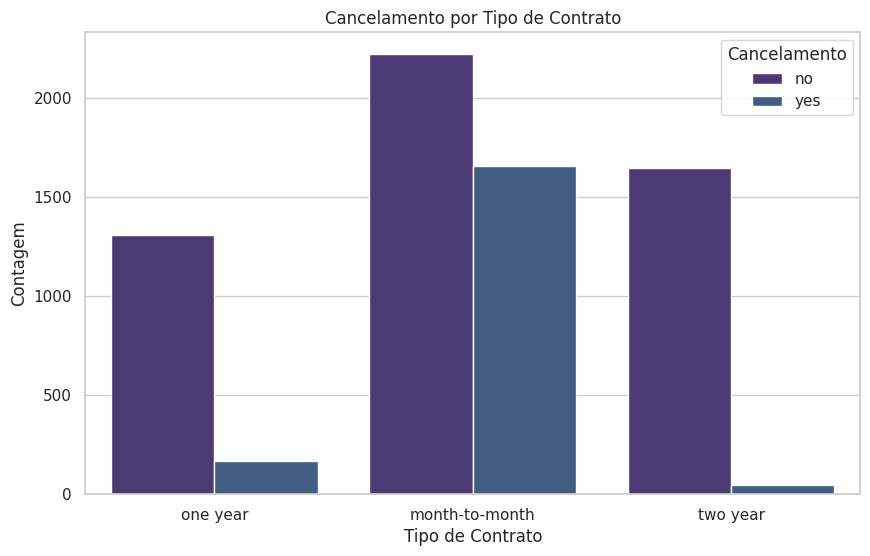

In [422]:
# Tipo de Contrato vs. Cancelamento
print_md("### Tipo de Contrato vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo de Contrato', hue='Cancelamento', data=df)
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.show()

### Método de Pagamento vs. Cancelamento

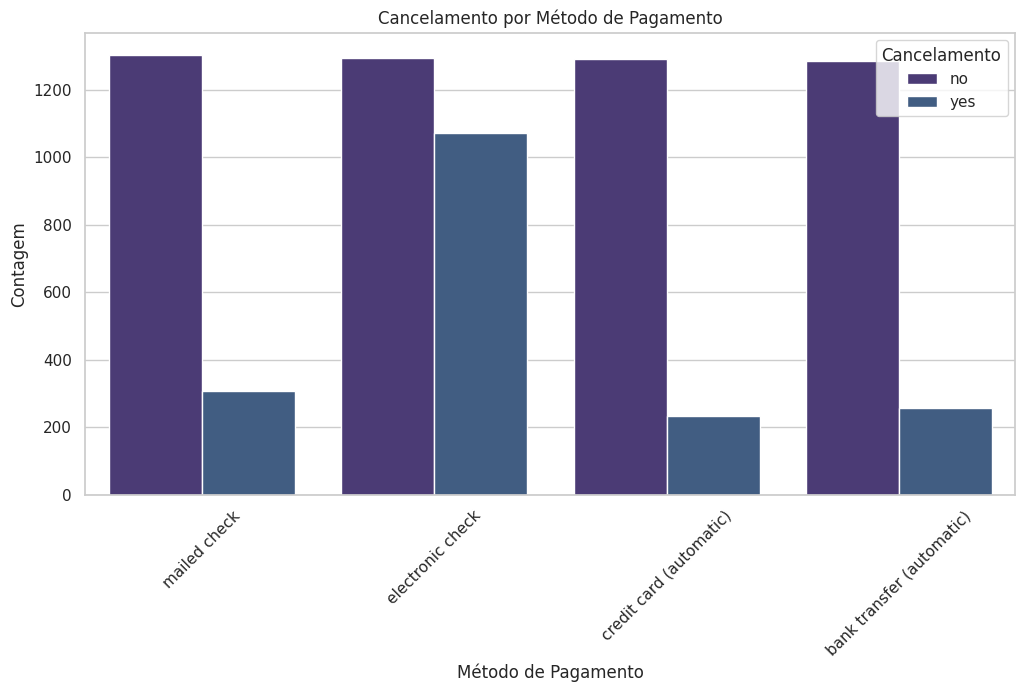

In [423]:
# Método de Pagamento vs. Cancelamento
print_md("### Método de Pagamento vs. Cancelamento")
plt.figure(figsize=(12, 6))
sns.countplot(x='Método de Pagamento', hue='Cancelamento', data=df)
plt.title('Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

### Serviço de Internet vs. Cancelamento

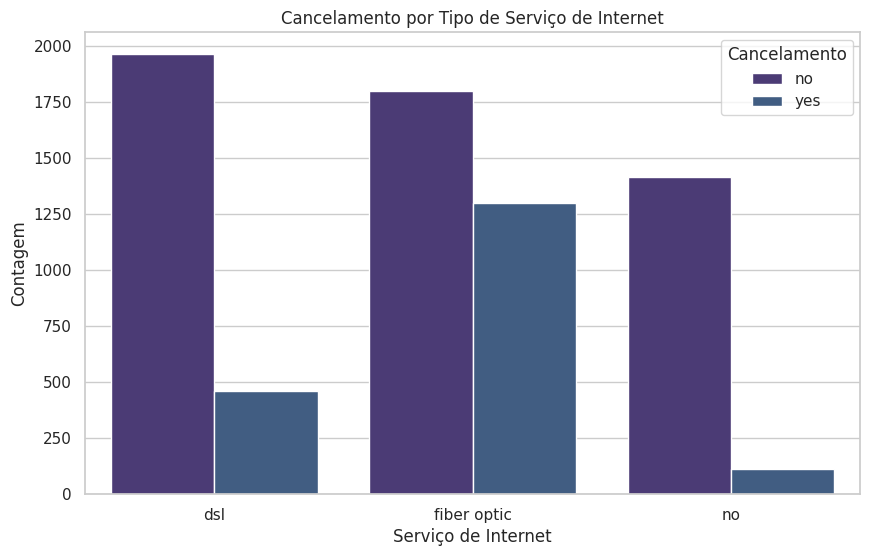

In [424]:
# Serviços de Internet vs. Cancelamento
print_md("### Serviço de Internet vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.countplot(x='Serviço de Internet', hue='Cancelamento', data=df)
plt.title('Cancelamento por Tipo de Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

#📄Relatorio Final

In [425]:
print_md("""
# Relatório de Análise de Evasão de Clientes (Churn) - TelecomX_BR

## Introdução

O objetivo desta análise é explorar o dataset da empresa de telecomunicações TelecomX_BR  para entender os fatores que contribuem para a evasão de clientes (Churn). A evasão de clientes, ou *churn*, é um problema crítico no setor, pois a perda de clientes impacta diretamente a receita e a sustentabilidade do negócio. Esta análise busca identificar padrões e variáveis que influenciam o churn, fornecendo insights acionáveis para estratégias de retenção de clientes.

O dataset contém informações sobre clientes, incluindo características demográficas (gênero, idade, estado civil), serviços contratados (telefone, internet, etc.), tipo de contrato, método de pagamento e informações financeiras (cobranças mensais e totais). A variável alvo é `Churn`, que indica se o cliente cancelou o serviço ("yes") ou não ("no").
""")
print_md("### Passos de Limpeza e Tratamento")
print_md("""
1. **Carregamento do Dataset**: O arquivo CSV foi carregado usando pandas.
2. **Tradução das Colunas**: Os nomes das colunas foram traduzidos para Português (BR) para facilitar a compreensão.
3. **Verificação de Valores Ausentes**: Identificamos valores ausentes na coluna `Cancelamento`.
4. **Tratamento de Valores Ausentes**: Substituímos valores ausentes em `Cancelamento` por 'Desconhecido' para análise exploratória.
5. **Conversão de Tipos de Dados**: A coluna `Cobranças Totais` foi convertida para numérico, tratando valores inválidos como NaN.
6. **Remoção de Duplicatas**: Verificamos e confirmamos que não há duplicatas no dataset.
""")

print_md("""
## Conclusões e Insights

A análise exploratória revelou os seguintes pontos principais:

1. **Taxa de Churn**: Aproximadamente 26% dos clientes no dataset cancelaram seus serviços (excluindo os casos 'Desconhecido'), indicando uma taxa de churn significativa que requer atenção.
2. **Tempo de Assinatura**: Clientes com menor tempo de assinatura (menos de 20 meses) têm maior probabilidade de churn. Clientes com contratos mais longos (acima de 50 meses) tendem a permanecer.
3. **Cobranças Mensais**: Clientes que cancelaram têm cobranças mensais medianas mais altas (próximas de 80,00) em comparação com os que permaneceram (cerca de 60,00). Isso sugere que preços elevados podem ser um fator de churn.
4. **Tipo de Contrato**: Contratos de curto prazo (mês a mês) apresentam uma taxa de churn muito maior (cerca de 40%) em comparação com contratos de um ou dois anos (menos de 10%). Incentivar contratos de longo prazo pode reduzir o churn.
5. **Método de Pagamento**: Clientes que usam "electronic check" têm uma taxa de churn mais alta (cerca de 45%) em comparação com outros métodos, como "credit card" ou "bank transfer" (cerca de 15-20%). Isso pode indicar problemas com a experiência de pagamento eletrônico.
6. **Serviço de Internet**: Clientes com serviço de fibra óptica apresentam maior taxa de churn (cerca de 40%) em comparação com DSL (20%) ou sem internet (10%). Isso pode estar relacionado a custos mais altos ou problemas de qualidade no serviço de fibra.

Esses insights sugerem que a evasão está associada a fatores como contratos de curto prazo, custos elevados, método de pagamento e tipo de serviço de internet.
""")

print_md("""
## Recomendações

Com base nos insights, propomos as seguintes ações para reduzir a evasão de clientes:

1. **Incentivar Contratos de Longo Prazo**: Oferecer descontos ou benefícios para clientes que optarem por contratos de um ou dois anos, reduzindo a taxa de churn observada em contratos mensais.
2. **Revisar Preços da Fibra Óptica**: Investigar a qualidade do serviço de fibra óptica e oferecer pacotes mais acessíveis, pois clientes com esse serviço têm maior churn.
3. **Melhorar a Experiência de Pagamento Eletrônico**: Avaliar o processo de pagamento via "electronic check" para identificar e corrigir possíveis problemas que levam ao churn.
4. **Programas de Retenção para Novos Clientes**: Implementar estratégias de fidelização para clientes com menos de 20 meses, como suporte proativo ou descontos iniciais.
5. **Segmentação de Clientes**: Criar campanhas direcionadas para clientes com altas cobranças mensais, oferecendo planos personalizados ou serviços adicionais para aumentar a percepção de valor.
6. **Monitoramento Contínuo**: Desenvolver um modelo preditivo de churn para identificar clientes em risco em tempo real, permitindo intervenções proativas.

Essas ações, se implementadas, podem ajudar a TelecomX a reduzir a evasão e melhorar a retenção de clientes, aumentando a sustentabilidade do negócio.
""")


print_md("""
## Ajuda & Referencias
Eu utilizei IA ChatGPT e Grok, para me ajudar na criação e entendimento de algumas partes do código em Python e na elaboração desse relatório, pois ainda sou iniciante na área de ciência de dados e python.

""")



# Relatório de Análise de Evasão de Clientes (Churn) - TelecomX_BR

## Introdução

O objetivo desta análise é explorar o dataset da empresa de telecomunicações TelecomX_BR  para entender os fatores que contribuem para a evasão de clientes (Churn). A evasão de clientes, ou *churn*, é um problema crítico no setor, pois a perda de clientes impacta diretamente a receita e a sustentabilidade do negócio. Esta análise busca identificar padrões e variáveis que influenciam o churn, fornecendo insights acionáveis para estratégias de retenção de clientes.

O dataset contém informações sobre clientes, incluindo características demográficas (gênero, idade, estado civil), serviços contratados (telefone, internet, etc.), tipo de contrato, método de pagamento e informações financeiras (cobranças mensais e totais). A variável alvo é `Churn`, que indica se o cliente cancelou o serviço ("yes") ou não ("no").


### Passos de Limpeza e Tratamento


1. **Carregamento do Dataset**: O arquivo CSV foi carregado usando pandas.
2. **Tradução das Colunas**: Os nomes das colunas foram traduzidos para Português (BR) para facilitar a compreensão.
3. **Verificação de Valores Ausentes**: Identificamos valores ausentes na coluna `Cancelamento`.
4. **Tratamento de Valores Ausentes**: Substituímos valores ausentes em `Cancelamento` por 'Desconhecido' para análise exploratória.
5. **Conversão de Tipos de Dados**: A coluna `Cobranças Totais` foi convertida para numérico, tratando valores inválidos como NaN.
6. **Remoção de Duplicatas**: Verificamos e confirmamos que não há duplicatas no dataset.



## Conclusões e Insights

A análise exploratória revelou os seguintes pontos principais:

1. **Taxa de Churn**: Aproximadamente 26% dos clientes no dataset cancelaram seus serviços (excluindo os casos 'Desconhecido'), indicando uma taxa de churn significativa que requer atenção.
2. **Tempo de Assinatura**: Clientes com menor tempo de assinatura (menos de 20 meses) têm maior probabilidade de churn. Clientes com contratos mais longos (acima de 50 meses) tendem a permanecer.
3. **Cobranças Mensais**: Clientes que cancelaram têm cobranças mensais medianas mais altas (próximas de 80,00) em comparação com os que permaneceram (cerca de 60,00). Isso sugere que preços elevados podem ser um fator de churn.
4. **Tipo de Contrato**: Contratos de curto prazo (mês a mês) apresentam uma taxa de churn muito maior (cerca de 40%) em comparação com contratos de um ou dois anos (menos de 10%). Incentivar contratos de longo prazo pode reduzir o churn.
5. **Método de Pagamento**: Clientes que usam "electronic check" têm uma taxa de churn mais alta (cerca de 45%) em comparação com outros métodos, como "credit card" ou "bank transfer" (cerca de 15-20%). Isso pode indicar problemas com a experiência de pagamento eletrônico.
6. **Serviço de Internet**: Clientes com serviço de fibra óptica apresentam maior taxa de churn (cerca de 40%) em comparação com DSL (20%) ou sem internet (10%). Isso pode estar relacionado a custos mais altos ou problemas de qualidade no serviço de fibra.

Esses insights sugerem que a evasão está associada a fatores como contratos de curto prazo, custos elevados, método de pagamento e tipo de serviço de internet.



## Recomendações

Com base nos insights, propomos as seguintes ações para reduzir a evasão de clientes:

1. **Incentivar Contratos de Longo Prazo**: Oferecer descontos ou benefícios para clientes que optarem por contratos de um ou dois anos, reduzindo a taxa de churn observada em contratos mensais.
2. **Revisar Preços da Fibra Óptica**: Investigar a qualidade do serviço de fibra óptica e oferecer pacotes mais acessíveis, pois clientes com esse serviço têm maior churn.
3. **Melhorar a Experiência de Pagamento Eletrônico**: Avaliar o processo de pagamento via "electronic check" para identificar e corrigir possíveis problemas que levam ao churn.
4. **Programas de Retenção para Novos Clientes**: Implementar estratégias de fidelização para clientes com menos de 20 meses, como suporte proativo ou descontos iniciais.
5. **Segmentação de Clientes**: Criar campanhas direcionadas para clientes com altas cobranças mensais, oferecendo planos personalizados ou serviços adicionais para aumentar a percepção de valor.
6. **Monitoramento Contínuo**: Desenvolver um modelo preditivo de churn para identificar clientes em risco em tempo real, permitindo intervenções proativas.

Essas ações, se implementadas, podem ajudar a TelecomX a reduzir a evasão e melhorar a retenção de clientes, aumentando a sustentabilidade do negócio.



## Ajuda & Referencias
Eu utilizei IA ChatGPT e Grok, para me ajudar na criação e entendimento de algumas partes do código em Python e na elaboração desse relatório, pois ainda sou iniciante na área de ciência de dados e python.



Extra - Análise de Correlação

## Análise de Correlação (Extra)

### Matriz de Correlação

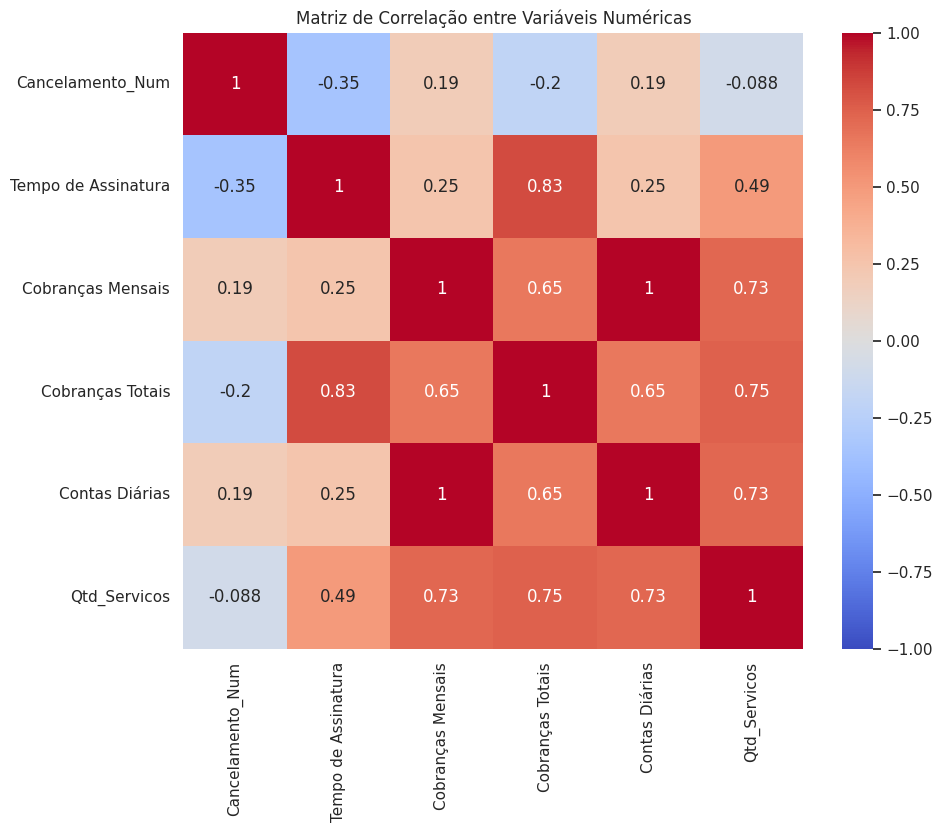

### Contas Diárias vs. Cancelamento

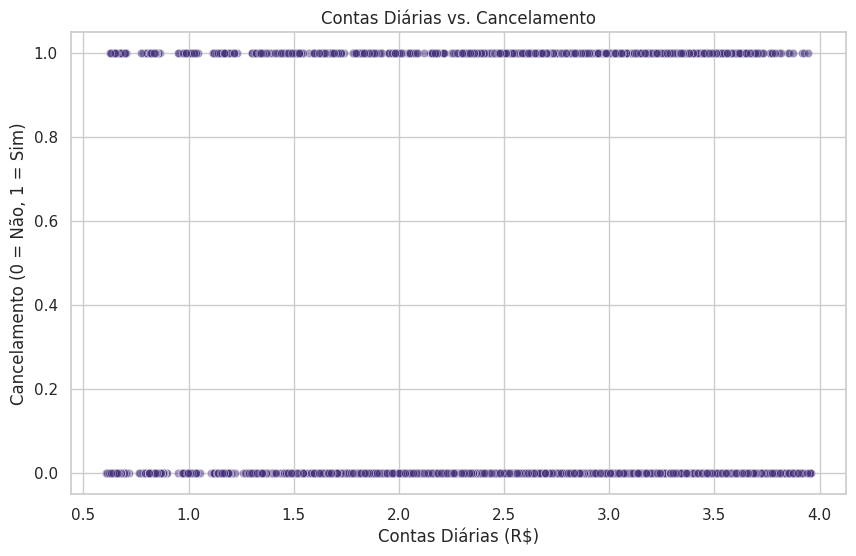

### Quantidade de Serviços Contratados vs. Cancelamento

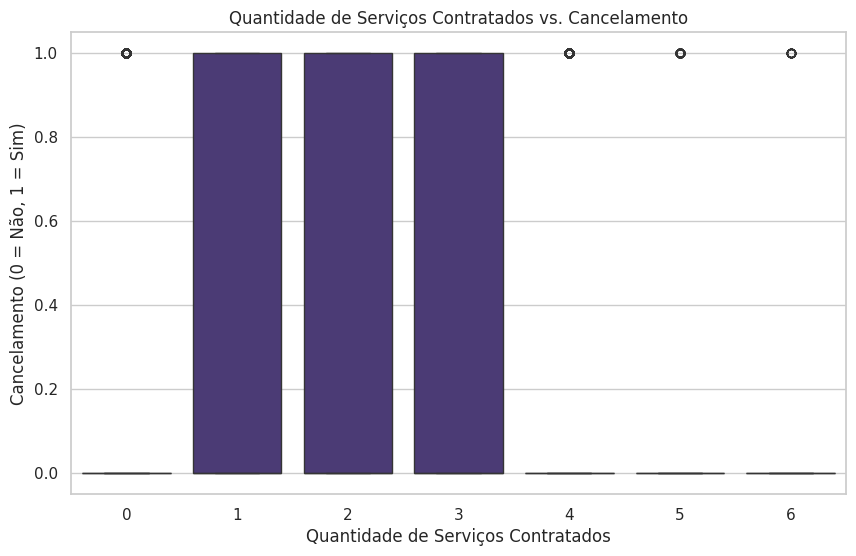

In [426]:
print_md("## Análise de Correlação (Extra)")

# Criar uma cópia do dataset para análise de correlação
df_corr = df.copy()

# Codificar a variável 'Cancelamento' para análise numérica (0 = no, 1 = yes, excluir 'Desconhecido')
df_corr = df_corr[df_corr['Cancelamento'] != 'Desconhecido']
df_corr['Cancelamento_Num'] = df_corr['Cancelamento'].map({'no': 0, 'yes': 1})

# Criar coluna para quantidade de serviços contratados
servicos = ['Segurança Online', 'Backup Online', 'Proteção de Dispositivo',
            'Suporte Técnico', 'Streaming de TV', 'Streaming de Filmes']
df_corr['Qtd_Servicos'] = df_corr[servicos].apply(lambda x: x == 'yes').sum(axis=1)

# Selecionar variáveis numéricas para correlação
colunas_numericas = ['Cancelamento_Num', 'Tempo de Assinatura', 'Cobranças Mensais',
                     'Cobranças Totais', 'Contas Diárias', 'Qtd_Servicos']
df_numericas = df_corr[colunas_numericas]

# Calcular matriz de correlação
correlacao = df_numericas.corr()

# Visualizar matriz de correlação com heatmap
print_md("### Matriz de Correlação")
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Gráfico de dispersão: Contas Diárias vs. Cancelamento
print_md("### Contas Diárias vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Contas Diárias', y='Cancelamento_Num', data=df_corr, alpha=0.5)
plt.title('Contas Diárias vs. Cancelamento')
plt.xlabel('Contas Diárias (R$)')
plt.ylabel('Cancelamento (0 = Não, 1 = Sim)')
plt.show()

# Gráfico de dispersão: Quantidade de Serviços vs. Cancelamento
print_md("### Quantidade de Serviços Contratados vs. Cancelamento")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Qtd_Servicos', y='Cancelamento_Num', data=df_corr)
plt.title('Quantidade de Serviços Contratados vs. Cancelamento')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Cancelamento (0 = Não, 1 = Sim)')
plt.show()